<a href="https://colab.research.google.com/github/thelearningcurves/geophysics/blob/master/Nmo%20with%20cubicSpline%20Interploation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [4]:
def reflection_time(t0 , vnmo,x):
  """ this function will take in the zero offset time t0, the offset distance x and the nmo velocity vnmo 
      and return the actual travel time that is recorded in the non-zero offset settings.
      Arguments:
      t0 = the zero offset time when x=0. This can be picked from the CMP gather plot as the point on time axis 
            when the hyperbola is at it's origin stage and not yet has started bending.
      x = different offset distances taken for the survey
      vnmo = it is the correction velocity we pick with utmost care and plug for making the hyperbola more or less flat. """

  t = np.sqrt(t0**2 + x**2/vnmo**2)
  return t 

In [13]:
def sample_trace(trace,time,dt):
  before = int(np.floor(time/dt))
  N = trace.size
  samples = np.arange(before-1, before+3)
  if any (samples<0) or any (samples >= N):
    amplitude = None
  else:
    times = dt * samples
    amps = trace[samples]
    interpolator = CubicSpline(times,amps)
    amplitude = interpolator(time)
    return amplitude


In [6]:
def nmo_correction (cmp,dt,offsets,velocities):
  nmo = np.zeros_like(cmp)
  nsamples = cmp.shape[0]
  times = np.arange(0,nsamples*dt,dt)
  for i ,t0 in enumerate(times):
    for j,x in enumerate(offsets):
      t = reflection_time(t0 ,velocities[i],x )
      amplitude = sample_trace(cmp[:,j],t,dt)
      if amplitude is None:
        nmo[i,j] = amplitude
  return nmo

In [19]:
#loading file  
data = np.load('/content/synthetic_cmp.npz')

dt = data['dt']
offsets = data['offsets']
CMP = data['CMP']
nsamples = CMP.shape[0]
noffsets = CMP.shape[1]
print('number of samples is {}'.format(nsamples))
print('number of offsets are  {}'.format(noffsets))
print(dt)



number of samples is 1200
number of offsets are  14
0.00045678391959799


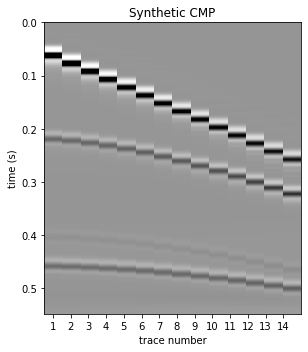

In [9]:
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111)
ax.set_title('Synthetic CMP')
ax.set_xlabel('trace number')
ax.set_ylabel('time (s)')
cutoff = 0.5
ax.imshow(CMP, extent=[0.5, noffsets+1, dt*nsamples, 0], 
          aspect=30, cmap='Greys', vmin=-cutoff, vmax=cutoff,
          interpolation='none' )
trace_numbers = list(range(1, noffsets + 1))
ax.set_xticks(trace_numbers)
fig.tight_layout()

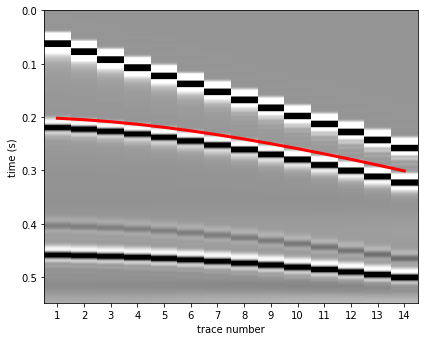

In [10]:
reflect_times = reflection_time(t0=0.2, x=offsets, vnmo=4000)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111)
ax.set_xlabel('trace number')
ax.set_ylabel('time (s)')
cutoff = 0.1
ax.imshow(CMP, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=20, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')
trace_numbers = list(range(1, noffsets + 1))
plt.plot( trace_numbers, reflect_times, '-r', linewidth=3)
ax.set_xticks(trace_numbers)
ax.set_ylim(nsamples*dt, 0)
ax.set_xlim(0.5, noffsets + 0.5)
fig.tight_layout()

In [32]:
times = np.arange(nsamples)*dt
v1, t1 = 3800, 0.22
v2, t2 = 4500, 0.46
# equation for a straight line between two points.
v_nmo = v1 + ((v2 - v1)/(t2 - t1))*(times - t1)
print(v_nmo)

[3158.33333333 3159.66561977 3160.9979062  ... 4753.08019263 4754.41247906
 4755.74476549]


In [15]:
nmo =nmo_correction(CMP,dt,offsets,v_nmo)

In [62]:
nsamples =CMP.shape[0]
dt = data['dt']

times = np.arange(0,nsamples*dt , dt)
for i, t0  in enumerate(times):
  for j ,x in enumerate(offsets):
    t = reflection_time(t0,v_nmo,x)
 
    

0.5930181159114181

In [75]:
trace = CMP[:,0]

before = int(np.floor(0.4/dt))

samples = np.arange(before-1,before+3)
N = trace.size
Times = dt*samples
amp = trace[samples]
print(amp)
interpolator = CubicSpline(Times,amp)
amplitude = interpolator(0.4)
print(amplitude)

[0.0057906  0.0075699  0.00926951 0.01085384]
0.008749207473685662
